In [82]:
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Load the data

In [56]:
import os

os.chdir("/Users/paba/Desktop/Coding/bootstrapping")
os.getcwd()
dataset = loadtxt("data/pima-indians-diabetes.csv", delimiter=",")

In [58]:
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


Seperate independent variables and the response variable.

In [65]:

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
print(X[0:5,])
print(Y[0:10])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


Split data into training and test sets.

In [66]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


Train the XGB model

In [77]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [69]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [70]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [83]:
#accuracy_score.roc_auc_score(y_test,y_pred)
roc_auc_score(y_test,y_pred)

0.7567096081588834

In [146]:
from sklearn.utils import resample
test_num = round(len(dataset)*0.90)

data = list(range(0,len(dataset)))
repetitions = 500
auc_results = numpy.zeros(repetitions)
for i in range(repetitions):
    boot = resample(data, replace=True, n_samples=test_num, random_state=i)
    oob = [x for x in data if x not in boot]
    X_train = X[boot,]
    X_test = X[oob,] 
    y_train= Y[boot] 
    y_test = Y[oob]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test,y_pred)
    auc_results[i] = auc


In [147]:
print(auc_results)
print("mean auc is {}".format(np.mean(auc_results)) )
print("standar deviation of auc is {}".format(np.std(auc_results)))

[0.76953441 0.70389725 0.69865106 0.72808908 0.70803483 0.70466981
 0.72489316 0.73013312 0.73523277 0.69037569 0.71042199 0.7196738
 0.71747382 0.71916061 0.71905687 0.7181878  0.69553877 0.71981169
 0.68090062 0.73770367 0.73027853 0.7080093  0.70336799 0.74229421
 0.68907741 0.73269231 0.74451932 0.70128115 0.74646594 0.70785985
 0.75659879 0.75017973 0.69937276 0.72516382 0.75565611 0.69064815
 0.72564103 0.73544974 0.73867314 0.7272619  0.70180931 0.72132353
 0.68741337 0.68147208 0.73483347 0.69799331 0.72962078 0.68955379
 0.73591234 0.69099099 0.7111165  0.67224672 0.714      0.71659201
 0.6900146  0.70778261 0.71536945 0.72629052 0.7779407  0.69339875
 0.71267504 0.71246275 0.71376518 0.73796357 0.72438352 0.71299433
 0.6972135  0.7458575  0.67544437 0.68518519 0.73458725 0.69544324
 0.72692882 0.73015042 0.73525074 0.69178571 0.7127193  0.67926774
 0.7297517  0.71311318 0.71130631 0.70725995 0.70169861 0.74316696
 0.72702703 0.69703518 0.73258936 0.70041856 0.75822525 0.67935

This script computes the auc of the model by running bootstrapping. 

In [149]:
import seaborn as sns


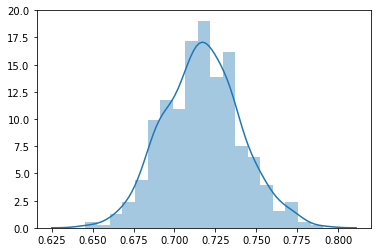

In [150]:
sns.distplot(auc_results)